In [2]:
import db_config as config
import pymysql 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
cnnt = pymysql.Connection(host=config.host, user=config.user, port=config.port, \
                          passwd = config.password, database= config.database)

In [4]:
# 서울 자동차 합계 
select_sql1 = """
SELECT SUM(car_sum) AS car_sum,
		 sido,
		 yyyy
FROM (
select left(yyyyMM,4) AS yyyy ,
		 SUM(합계)  AS car_sum,
		 sido
from car_sigungu gu_data 
GROUP BY yyyyMM , sido) AS a
GROUP BY yyyy, sido
"""
# 일반차 , 전기차 데이터 가져오기
total_sql = "SELECT LEFT(yyyyMM,4), minus_data, e_data from total_car tc where sido = '서울'"

In [5]:
# 커서 생성
cursor = cnnt.cursor()

In [6]:
# 서울 자동차 합계 쿼리 실행
cursor.execute(select_sql1)

237

In [7]:
# 서울 자동차 합계 쿼리 결과
result1 = cursor.fetchall()

In [8]:
# 데이터 프레임 변환
r_pd1 = pd.DataFrame(result1, columns=['car_sum', 'sido', 'yyyy'])

In [9]:
# 데이터 형 변환
r_pd1['car_sum'] = r_pd1['car_sum'].astype(int)

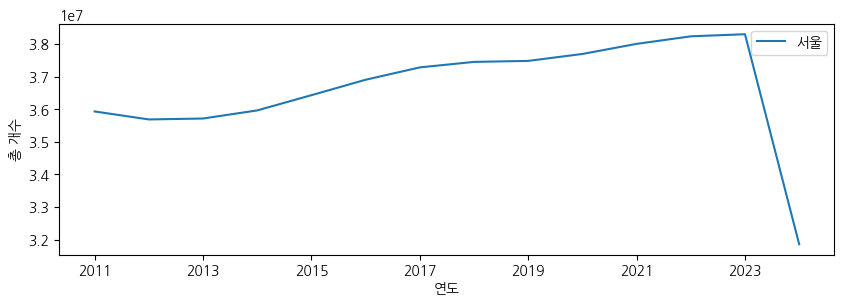

In [11]:
# 서울 자동차 합계 차트 생성
fig, ax = plt.subplots()

plot_a = r_pd1[r_pd1['sido'] == '서울'].set_index('yyyy')['car_sum'].plot(figsize=(10,3),ax=ax)
plt.ylabel('총 개수')
plt.xlabel("연도")

ax.legend(["서울"]);

plt.show()

In [12]:
# 일반차, 전기차 쿼리 실행
cursor.execute(total_sql)

153

In [13]:
# 일반차, 전기차 쿼리 결과
total_result = cursor.fetchall()

In [14]:
# 일반차, 전기차 결과 데이터프레임
r_pd2 = pd.DataFrame(total_result, columns=['yyyyMM', 'normal', 'electric'])

In [15]:
a = r_pd2.groupby(['yyyyMM']).sum()

In [16]:
a.normal = a.normal.astype(int)

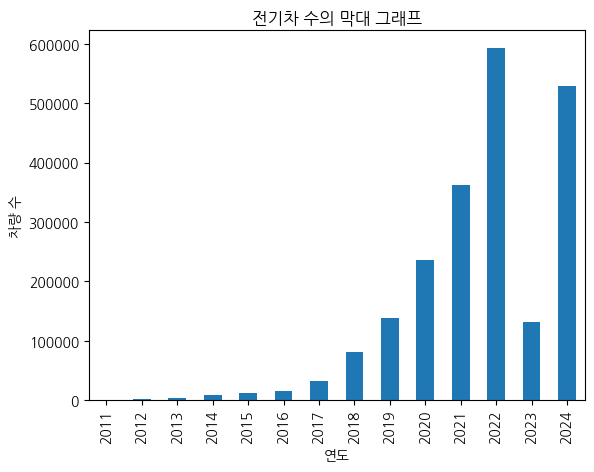

In [17]:
a['electric'].plot(kind='bar', stacked=True)
plt.xlabel('연도')
plt.ylabel('차량 수')
plt.title('전기차 수의 막대 그래프')
plt.show()

In [18]:
a.columns = ['일반차', '전기차']

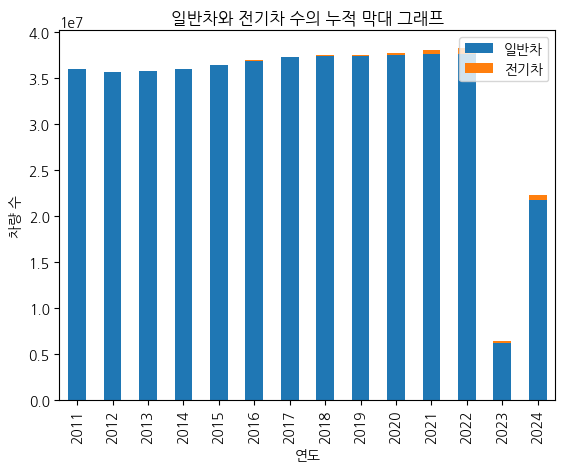

In [19]:
# 누적 막대 그래프 그리기
a.plot(kind='bar', stacked=True)
# 그래프 제목과 레이블 추가
plt.xlabel('연도')
plt.ylabel('차량 수')
plt.title('일반차와 전기차 수의 누적 막대 그래프')
plt.show()